In [22]:
import numpy as np
from matplotlib import pyplot as plt
from blueqat import opt
Opt = opt.Opt

In [23]:
import pandas as pd
import numpy as np
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import gym
import os
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)
env = gym.make("MountainCar-v0")

In [24]:
qstr = "{}*(1 - (q0 + q1 + q2))^2"

# なんか色々定義

In [25]:
def get_matrix(position, velocity, a=5, b=1e-2, c=1):
    # 中心を0に近づけ、負の値を正にする
    e_p = abs(position + 0.5)**2

    matrix = [-1*(e_p+a*abs(velocity + b * -1)), -1*(e_p+a *
                                                     abs(velocity + b * 0)), -1*(e_p+a*abs(velocity + b * 1))]
    return matrix

In [26]:
qaoa_action_dic = {(1, 0, 0): 0, (0, 1, 0): 1,
                   (0, 0, 1): 2, (1, 0): 0, (0, 1): 2}


def get_action(action_qaoa):
    return qaoa_action_dic[action_qaoa]


def get_qaoa(p, v, a, b, c):
    return Opt().add(np.diag(get_matrix(p, v, a, b))).add(qstr.format(c))

def get_max_position(obs):
    return max([(i[0] + 0.5)**2 for i in obs])

In [42]:
p = -0.57101507
v = 0.01636341
a = 1000
b = 5e-2
c = 10
get_matrix(p, v, a, b)

[-33.64163314016711, -16.3684531401671, -66.3684531401671]

In [43]:
problem = get_qaoa(p, v, a, b, c)

In [44]:
problem.qaoa().most_common()

(((1, 0, 1), 0.8569058085407004),)

In [45]:
problem.run()

[1, 0, 1]

In [46]:
problem.qubo

array([[-43.64163314,  20.        ,  20.        ],
       [  0.        , -26.36845314,  20.        ],
       [  0.        ,   0.        , -76.36845314]])

# よさげなパラメータで動してみる。

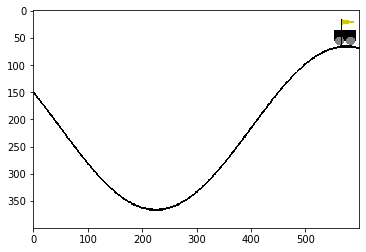

In [11]:
observation = env.reset()

fig = plt.figure()
ims = []
actions = []
missed_count = 0
obs = []

for i in range(200):
    p, v = observation

    problem = get_qaoa(p, v, a, b, c)

    action_qaoa = problem.qaoa().most_common()[0][0]
    while sum(action_qaoa) != 1:
        missed_count += 1
        action_qaoa = problem.qaoa().most_common()[0][0]

    action = get_action(action_qaoa)

    actions.append(action)

    observation, reward, done, info = env.step(action)
    obs.append(observation)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])

    if done == True:
        break

In [13]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

In [36]:
actions

[2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1]

In [37]:
missed_count

22

In [38]:
len(actions)

197

In [47]:
pd.DataFrame(actions)[0].value_counts()

2    102
0     76
1     19
Name: 0, dtype: int64

# shot = 1で動かしてみる

In [21]:
observation = env.reset()

actions = []
missed_count = 0
obs = []

for i in range(200):
    p, v = observation

    problem = get_qaoa(p, v, a, b, c)

    action_qaoa = tuple(problem.run())
    while sum(action_qaoa) != 1:
        missed_count += 1
        action_qaoa = tuple(problem.run())

    action = get_action(action_qaoa)

    actions.append(action)

    observation, reward, done, info = env.step(action)
    obs.append(observation)

    if done == True:
        break

In [41]:
get_max_position(obs)

0.02881214728264116

In [24]:
pd.Series(actions).value_counts()

0    76
2    62
1    62
dtype: int64

# vcoptしてみる

In [11]:
from vcopt import vcopt

In [12]:
a = [1e1, 1e2, 1e3]
b = np.linspace(1e-2, 1e-1, 10)
c = [1e1, 1e2, 1e3]

In [13]:
params = [a,b,c]

In [14]:
# 50回回して評価

def score(para):
    a,b,c = para
    observation = env.reset()
    missed_count = 0
    obs = []
    print(a,b,c)

    for i in range(50):
        p, v = observation

        problem = get_qaoa(p, v, a, b, c)

        action_qaoa = tuple(problem.run())
        while sum(action_qaoa) != 1:
            missed_count += 1
            if missed_count == 50:
                return 10000
            action_qaoa = tuple(problem.run())

        action = get_action(action_qaoa)

        observation, reward, done, info = env.step(action)
        
        obs.append(observation)

        if done == True:
            return -1
        
    return -get_max_position(obs)

In [15]:
import time

In [16]:
start = time.time()
para, score = vcopt().dcGA(
    params,
    score,
    -1.0
)
seconds = time.time() - start

1000.0 0.07 100.0
1000.0 0.05000000000000001 100.0
100.0 0.08 100.0
1000.0 0.1 10.0
100.0 0.1 100.0
1000.0 0.1 10.0
10.0 0.05000000000000001 100.0
10.0 0.030000000000000006 10.0
1000.0 0.01 100.0
10.0 0.06000000000000001 10.0
100.0 0.01 10.0
100.0 0.020000000000000004 10.0
1000.0 0.020000000000000004 10.0
100.0 0.1 100.0
10.0 0.01 100.0
10.0 0.06000000000000001 100.0
10.0 0.06000000000000001 10.0
10.0 0.020000000000000004 1000.0
10.0 0.07 10.0
1000.0 0.030000000000000006 1000.0
1000.0 0.01 10.0
10.0 0.04000000000000001 10.0
10.0 0.09000000000000001 100.0
10.0 0.1 1000.0
10.0 0.030000000000000006 10.0
1000.0 0.06000000000000001 100.0
100.0 0.030000000000000006 1000.0
1000.0 0.020000000000000004 1000.0
10.0 0.04000000000000001 1000.0
100.0 0.1 10.0
1000.0 0.05000000000000001 100.0
1000.0 0.1 1000.0
1000.0 0.1 10.0
100.0 0.04000000000000001 100.0
1000.0 0.05000000000000001 100.0
100.0 0.1 100.0
1000.0 0.1 10.0
1000.0 0.09000000000000001 10.0
1000.0 0.01 10.0
1000.0 0.1 10.0
100.0 0.1 10.0

1000.0 0.06000000000000001 100.0
100.0 0.08 10.0
10.0 0.04000000000000001 100.0
100.0 0.1 10.0
10.0 0.05000000000000001 100.0
100.0 0.06000000000000001 1000.0
10.0 0.1 10.0
100.0 0.1 10.0
100.0 0.07 10.0
10.0 0.08 10.0
10.0 0.1 10.0
10.0 0.05000000000000001 100.0
10.0 0.1 10.0
10.0 0.030000000000000006 100.0
1000.0 0.05000000000000001 10.0
1000.0 0.05000000000000001 1000.0
1000.0 0.1 10.0
100.0 0.1 100.0
100.0 0.08 10.0
100.0 0.08 100.0
100.0 0.01 10.0
1000.0 0.1 100.0
1000.0 0.08 100.0
100.0 0.07 100.0
10.0 0.06000000000000001 1000.0
100.0 0.030000000000000006 10.0
1000.0 0.07 10.0
100.0 0.06000000000000001 10.0
100.0 0.07 10.0
100.0 0.09000000000000001 10.0
100.0 0.1 10.0
1000.0 0.1 100.0
100.0 0.04000000000000001 10.0
100.0 0.020000000000000004 10.0
1000.0 0.1 10.0
1000.0 0.05000000000000001 10.0
100.0 0.08 100.0
100.0 0.07 10.0
100.0 0.05000000000000001 10.0
100.0 0.05000000000000001 100.0
100.0 0.06000000000000001 10.0
100.0 0.020000000000000004 1000.0
100.0 0.05000000000000001 10

100.0 0.08 100.0
10.0 0.08 10.0
100.0 0.08 100.0
1000.0 0.08 10.0
1000.0 0.08 100.0
1000.0 0.08 10.0
100.0 0.06000000000000001 100.0
100.0 0.1 10.0
100.0 0.1 100.0
1000.0 0.06000000000000001 1000.0
1000.0 0.01 100.0
1000.0 0.1 10.0
100.0 0.06000000000000001 1000.0
10.0 0.08 10.0
100.0 0.1 100.0
100.0 0.07 10.0
1000.0 0.06000000000000001 10.0
100.0 0.1 10.0
1000.0 0.09000000000000001 100.0
100.0 0.1 10.0
100.0 0.08 100.0
1000.0 0.09000000000000001 1000.0
1000.0 0.09000000000000001 100.0
1000.0 0.08 10.0
100.0 0.030000000000000006 10.0
100.0 0.07 10.0
100.0 0.07 1000.0
100.0 0.08 10.0
100.0 0.08 10.0
100.0 0.07 100.0
100.0 0.05000000000000001 100.0
100.0 0.1 10.0
100.0 0.07 1000.0
1000.0 0.05000000000000001 10.0
1000.0 0.05000000000000001 100.0
1000.0 0.07 10.0
100.0 0.09000000000000001 10.0
100.0 0.08 10.0
1000.0 0.08 10.0
100.0 0.09000000000000001 10.0
100.0 0.09000000000000001 100.0
100.0 0.08 100.0
1000.0 0.05000000000000001 100.0
100.0 0.1 10.0
100.0 0.1 100.0
1000.0 0.0500000000000

100.0 0.08 1000.0
100.0 0.09000000000000001 10.0
1000.0 0.08 10.0
10.0 0.06000000000000001 100.0
1000.0 0.06000000000000001 10.0
100.0 0.08 100.0
100.0 0.1 10.0
100.0 0.06000000000000001 100.0
100.0 0.1 10.0
100.0 0.08 10.0
100.0 0.08 10.0
100.0 0.1 10.0
100.0 0.08 10.0
100.0 0.08 10.0
100.0 0.08 100.0
100.0 0.1 10.0
10.0 0.1 100.0
1000.0 0.08 10.0
10.0 0.1 10.0
1000.0 0.1 10.0
10.0 0.04000000000000001 100.0
1000.0 0.05000000000000001 100.0
1000.0 0.07 1000.0
1000.0 0.09000000000000001 100.0
1000.0 0.09000000000000001 100.0
100.0 0.030000000000000006 1000.0
100.0 0.06000000000000001 10.0
10.0 0.08 10.0
10.0 0.1 10.0
10.0 0.08 10.0
100.0 0.08 10.0
100.0 0.08 100.0
100.0 0.09000000000000001 10.0
1000.0 0.07 100.0
1000.0 0.01 1000.0
100.0 0.09000000000000001 100.0
100.0 0.09000000000000001 10.0
100.0 0.07 100.0
100.0 0.08 10.0
100.0 0.08 10.0
100.0 0.08 10.0
100.0 0.1 10.0
100.0 0.08 10.0
100.0 0.05000000000000001 10.0
100.0 0.07 10.0
100.0 0.09000000000000001 10.0
100.0 0.090000000000000

100.0 0.08 10.0
100.0 0.08 10.0
1000.0 0.08 10.0
100.0 0.030000000000000006 100.0
100.0 0.08 10.0
100.0 0.09000000000000001 10.0
10.0 0.09000000000000001 10.0
1000.0 0.09000000000000001 10.0
1000.0 0.1 10.0
100.0 0.07 10.0
10.0 0.09000000000000001 10.0
1000.0 0.08 100.0
10.0 0.06000000000000001 100.0
10.0 0.08 10.0
1000.0 0.020000000000000004 1000.0
100.0 0.08 10.0
100.0 0.08 100.0
10.0 0.08 1000.0
100.0 0.09000000000000001 10.0
1000.0 0.09000000000000001 10.0
100.0 0.08 10.0
10.0 0.07 10.0
100.0 0.09000000000000001 1000.0
100.0 0.05000000000000001 10.0
10.0 0.08 100.0
1000.0 0.05000000000000001 10.0
100.0 0.08 10.0
100.0 0.08 10.0
100.0 0.08 100.0
1000.0 0.1 100.0
1000.0 0.08 1000.0
1000.0 0.08 100.0
1000.0 0.1 1000.0
1000.0 0.1 1000.0
1000.0 0.08 100.0
100.0 0.09000000000000001 10.0
100.0 0.09000000000000001 10.0
100.0 0.09000000000000001 10.0
100.0 0.07 10.0
100.0 0.07 10.0
100.0 0.09000000000000001 10.0
1000.0 0.08 100.0
100.0 0.1 10.0
100.0 0.1 100.0
100.0 0.07 100.0
1000.0 0.08 1

1000.0 0.07 1000.0
1000.0 0.08 100.0
10.0 0.08 100.0
1000.0 0.030000000000000006 100.0
1000.0 0.08 1000.0
1000.0 0.1 10.0
10.0 0.030000000000000006 100.0
1000.0 0.09000000000000001 10.0
100.0 0.08 100.0
100.0 0.07 10.0
100.0 0.09000000000000001 100.0
100.0 0.07 10.0
100.0 0.04000000000000001 10.0
100.0 0.08 10.0
100.0 0.07 10.0
100.0 0.05000000000000001 10.0
1000.0 0.08 10.0
1000.0 0.08 10.0
100.0 0.08 100.0
1000.0 0.08 10.0
100.0 0.08 10.0
100.0 0.05000000000000001 10.0
10.0 0.08 100.0
100.0 0.08 10.0
100.0 0.1 10.0
100.0 0.1 10.0
100.0 0.06000000000000001 10.0
100.0 0.030000000000000006 1000.0
100.0 0.030000000000000006 1000.0
100.0 0.020000000000000004 10.0
100.0 0.08 10.0
100.0 0.05000000000000001 10.0
10.0 0.04000000000000001 10.0
100.0 0.030000000000000006 10.0
100.0 0.08 10.0
100.0 0.08 10.0
100.0 0.07 10.0
100.0 0.08 100.0
10.0 0.08 10.0
10.0 0.08 100.0
1000.0 0.08 10.0


In [17]:
seconds

2786.855167388916

In [20]:
a,b,c = para

-0.20852494827442444

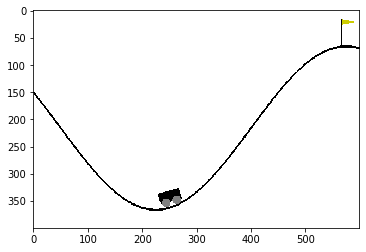

In [21]:
observation = env.reset()

fig = plt.figure()
ims = []
actions = []
missed_count = 0
obs = []

for i in range(200):
    p, v = observation

    problem = get_qaoa(p, v, a, b, c)

    action_qaoa = problem.qaoa().most_common()[0][0]
    while sum(action_qaoa) != 1:
        missed_count += 1
        action_qaoa = problem.qaoa().most_common()[0][0]

    action = get_action(action_qaoa)

    actions.append(action)

    observation, reward, done, info = env.step(action)
    obs.append(observation)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])

    if done == True:
        break